In [ ]:
import torch
import numpy as np

**List-Array-Tensor Differences**

In [ ]:
list = [[1,2,3,4,5],[6,7,8,9,0]]
list

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 0]]

In [ ]:
array = np.random.rand(3,4)
array

array([[0.0750999 , 0.10431939, 0.0335003 , 0.19367782],
       [0.49913965, 0.96166025, 0.67091515, 0.9822427 ],
       [0.21089793, 0.51714199, 0.44180284, 0.16377344]])

In [ ]:
tensor_2d = torch.rand(3,4)
tensor_2d

tensor([[0.8656, 0.5281, 0.0747, 0.8392],
        [0.3345, 0.5489, 0.0466, 0.6984],
        [0.1571, 0.4433, 0.9292, 0.6196]])

In [ ]:
tensor_3d = torch.zeros(3,4,5)
tensor_3d

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

**Exercises with tensor**

In [ ]:
tensor1 = torch.arange(10)
tensor1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
tensor2 = tensor1.reshape(2,5)
tensor2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
tensor2 = tensor2.reshape(2,-1)
tensor2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
tensor3 = tensor1.view(2,5)
tensor3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
tensor3[:,1]

tensor([1, 6])

In [ ]:
tensor3[:,1:]

tensor([[1, 2, 3, 4],
        [6, 7, 8, 9]])

**Math with tensor**

In [ ]:
tensor3 + tensor2

tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]])

In [ ]:
torch.add(tensor3,tensor2)

tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]])

In [ ]:
torch.sub(tensor3,tensor2)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [ ]:
torch.mul(tensor3,tensor2)

tensor([[ 0,  1,  4,  9, 16],
        [25, 36, 49, 64, 81]])

In [ ]:
torch.div(tensor3,tensor2)

tensor([[nan, 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
torch.pow(tensor3,tensor2)

tensor([[        1,         1,         4,        27,       256],
        [     3125,     46656,    823543,  16777216, 387420489]])

**Create Basic Neural Network Model**

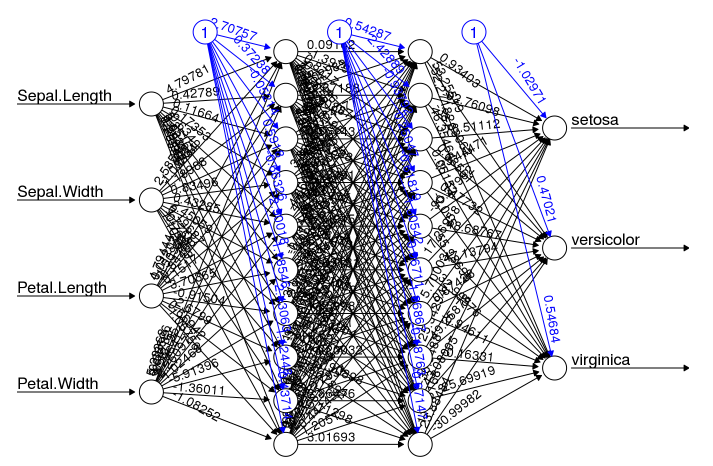

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 4, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
torch.manual_seed(41)

model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

df = pd.read_csv(url)

df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
df["variety"] = df["variety"].replace("Setosa",0.0)
df["variety"] = df["variety"].replace("Versicolor",1.0)
df["variety"] = df["variety"].replace("Virginica",2.0)

df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
x = df.drop("variety", axis =1)
Y = df["variety"]
x.values


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
Y.values


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, random_state=41)


In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [ ]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
Y_test = torch.tensor(Y_test, dtype=torch.long)
Y_train = torch.tensor(Y_train, dtype=torch.long)


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [ ]:
epochs = 100
losses = []

for i in range (epochs):
  Y_pred = model.forward(x_train)

  loss = criterion(Y_pred, Y_train)

  losses.append(loss)

  if i % 10 == 0:
    print(f"Epoch: {i} - Loss: {loss} ")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 - Loss: 1.0884480476379395 
Epoch: 10 - Loss: 0.9831117987632751 
Epoch: 20 - Loss: 0.7723526358604431 
Epoch: 30 - Loss: 0.5206447839736938 
Epoch: 40 - Loss: 0.3741261065006256 
Epoch: 50 - Loss: 0.2743684649467468 
Epoch: 60 - Loss: 0.19111663103103638 
Epoch: 70 - Loss: 0.13196046650409698 
Epoch: 80 - Loss: 0.09569627791643143 
Epoch: 90 - Loss: 0.0741707980632782 


Text(0.5, 0, 'Epochs')

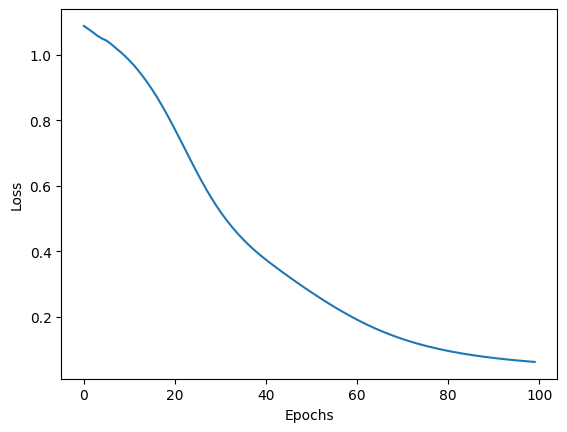

In [ ]:

plt.plot(range(epochs), [loss.item() for loss in losses])
plt.ylabel("Loss")
plt.xlabel("Epochs")


In [ ]:
with torch.no_grad():
  Y_eval = model.forward(x_test)
  loss = criterion(Y_eval, Y_test)

loss

tensor(0.1364)

In [ ]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(x_test):
        y_value = model.forward(data)
        print(f"{i+1}- str{y_value} \t {Y_test[i]} \t {y_value.argmax().item()}" )

        if y_value.argmax().item() == Y_test[i]:
            correct += 1

print(correct)


1- strtensor([-0.2224,  8.8829, 10.8361]) 	 2 	 2
2- strtensor([-1.6730,  9.9012, 15.0000]) 	 2 	 2
3- strtensor([-1.1800, 11.3278, 15.9060]) 	 2 	 2
4- strtensor([2.1575, 8.7202, 5.9789]) 	 1 	 1
5- strtensor([-0.5991, 10.1965, 13.2912]) 	 2 	 2
6- strtensor([3.5257, 8.4342, 2.9346]) 	 1 	 1
7- strtensor([ 0.3939,  9.3296, 10.2183]) 	 2 	 2
8- strtensor([2.3043, 8.7517, 5.7339]) 	 1 	 1
9- strtensor([-0.0933,  9.7571, 11.7289]) 	 2 	 2
10- strtensor([-1.7397, 10.4939, 15.9063]) 	 2 	 2
11- strtensor([0.5069, 9.1519, 9.7651]) 	 2 	 2
12- strtensor([ 11.0981,   6.1367, -14.8501]) 	 0 	 0
13- strtensor([  9.9691,   5.5718, -13.3867]) 	 0 	 0
14- strtensor([3.6234, 7.0334, 0.9098]) 	 1 	 1
15- strtensor([ 10.0161,   6.1168, -12.7649]) 	 0 	 0
16- strtensor([0.7758, 9.1518, 9.2404]) 	 2 	 2
17- strtensor([ 10.1996,   5.6871, -13.6854]) 	 0 	 0
18- strtensor([-0.0263,  8.9841, 10.5860]) 	 1 	 2
19- strtensor([ 11.2853,   6.2303, -15.0927]) 	 0 	 0
20- strtensor([  9.2283,   5.3393, -12.2455

**Observation NEW Data On The Network**

In [ ]:
new_data = ([4.2, 2.7, 6.8, 1.7])

In [ ]:
new_data_tensor = torch.tensor(new_data)
with torch.no_grad():
    print(model(new_data_tensor))



tensor([-4.4177,  8.3116, 18.2746])


**Save and Load NN Model**

In [ ]:
torch.save(model.state_dict(), "Iris with nn.pt")

In [ ]:
new_model = Model()

new_model.load_state_dict(torch.load("Iris with nn.pt"))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)

**Convolutional Neural Network**

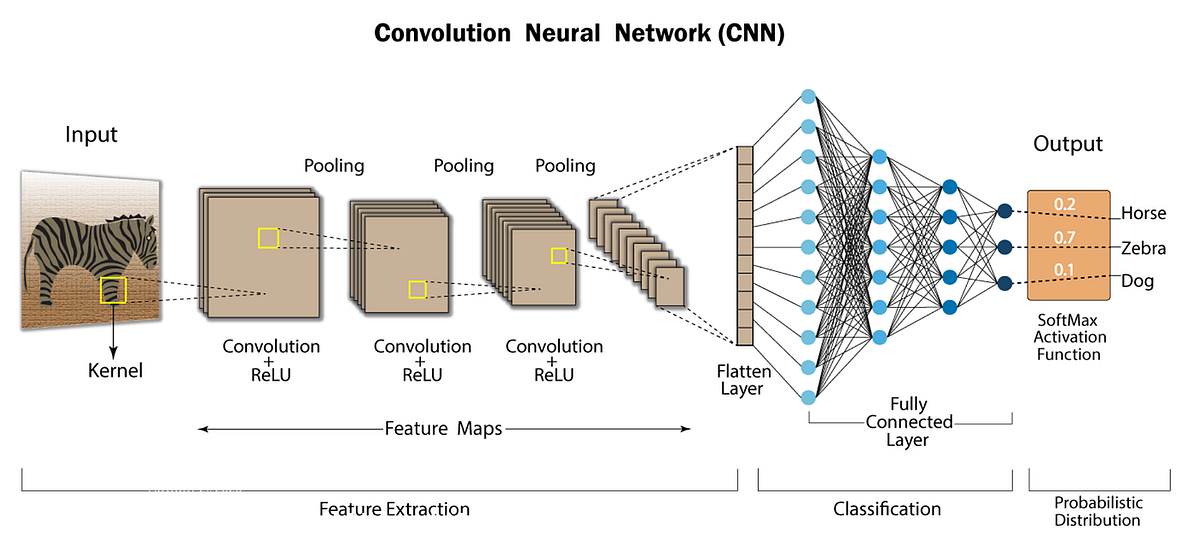

In [ ]:
import torch
import torch.nn as nn
import torch.nn. functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
transform = transforms.ToTensor()


In [ ]:
train_data = datasets.MNIST(root="/cnn_data", train=True, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data = datasets.MNIST(root="/cnn_data", train=False, download=True, transform=transform)

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [ ]:
for i , (X_Train, y_train) in enumerate(train_data):
  break

In [ ]:
X_Train.shape

torch.Size([1, 28, 28])

In [ ]:
x = X_Train.view(1,1,28,28)

In [ ]:
x = F.relu(conv1(x))

In [ ]:
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
x = F.relu(conv2(x))

In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

**Create CNN Model**

In [ ]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)

    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)


    X = X.view(-1, 16*5*5)


    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


In [ ]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time

start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 500 == 0:
            print(f"Epoch: {i}  Batch: {b}  Loss: {loss.item()}")

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

            loss = criterion(y_val, y_test)

    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time

print(f"Total time (minutes): {total / 60}")


Epoch: 0  Batch: 500  Loss: 0.33633095026016235
Epoch: 0  Batch: 1000  Loss: 0.5349848866462708
Epoch: 0  Batch: 1500  Loss: 0.055179618299007416
Epoch: 0  Batch: 2000  Loss: 0.5566567182540894
Epoch: 0  Batch: 2500  Loss: 0.09642040729522705
Epoch: 0  Batch: 3000  Loss: 0.007758188061416149
Epoch: 0  Batch: 3500  Loss: 0.004284966737031937
Epoch: 0  Batch: 4000  Loss: 0.01960762031376362
Epoch: 0  Batch: 4500  Loss: 0.0008029189775697887
Epoch: 0  Batch: 5000  Loss: 0.04208856448531151
Epoch: 0  Batch: 5500  Loss: 0.0018098928267136216
Epoch: 0  Batch: 6000  Loss: 0.00038789428072050214
Epoch: 1  Batch: 500  Loss: 0.00829227827489376
Epoch: 1  Batch: 1000  Loss: 0.012146287597715855
Epoch: 1  Batch: 1500  Loss: 0.017537157982587814
Epoch: 1  Batch: 2000  Loss: 0.0019016513833776116
Epoch: 1  Batch: 2500  Loss: 0.0057013072073459625
Epoch: 1  Batch: 3000  Loss: 0.0332382395863533
Epoch: 1  Batch: 3500  Loss: 0.0017011186573654413
Epoch: 1  Batch: 4000  Loss: 0.05203569680452347
Epoch: 

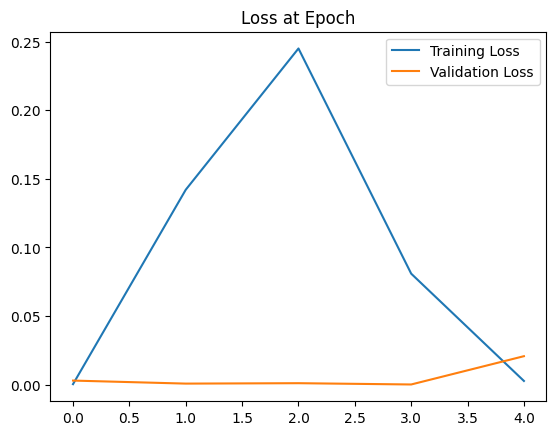

In [ ]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

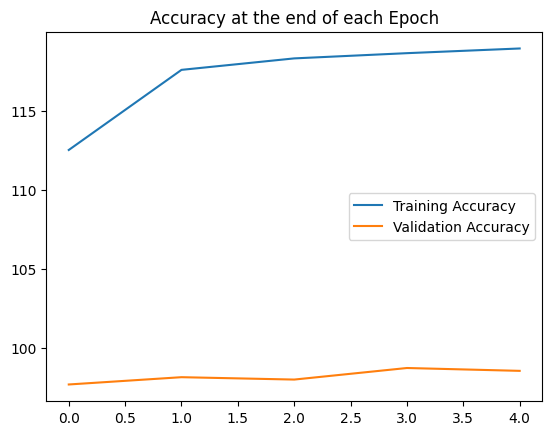

In [ ]:
plt.plot([t/500 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [ ]:
test_load_total = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_total:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
correct.item()/len(test_data)*100

98.57000000000001

In [ ]:
test_data[1905]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1020, 0.7569,
           0.3686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.9961,
           0.6353, 0.0000, 0.0000, 0.0000, 

In [ ]:
test_data[1905][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1020, 0.7569,
          0.3686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.9961,
          0.6353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

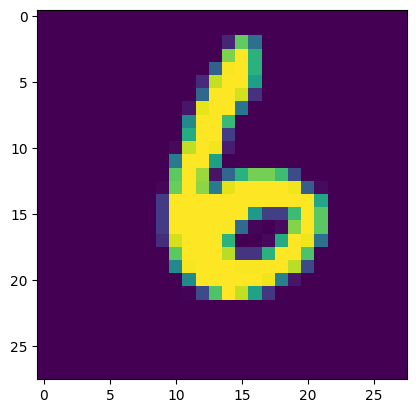

In [ ]:
plt.imshow(test_data[1905][0].reshape(28,28))

In [ ]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1905][0].view(1,1,28,28))

In [ ]:
new_prediction

tensor([[-19.1338, -22.1263, -29.0204, -25.0901, -23.9260, -18.8757,   0.0000,
         -39.2432, -21.4208, -32.1105]])

In [ ]:
new_prediction.argmax()

tensor(6)